In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


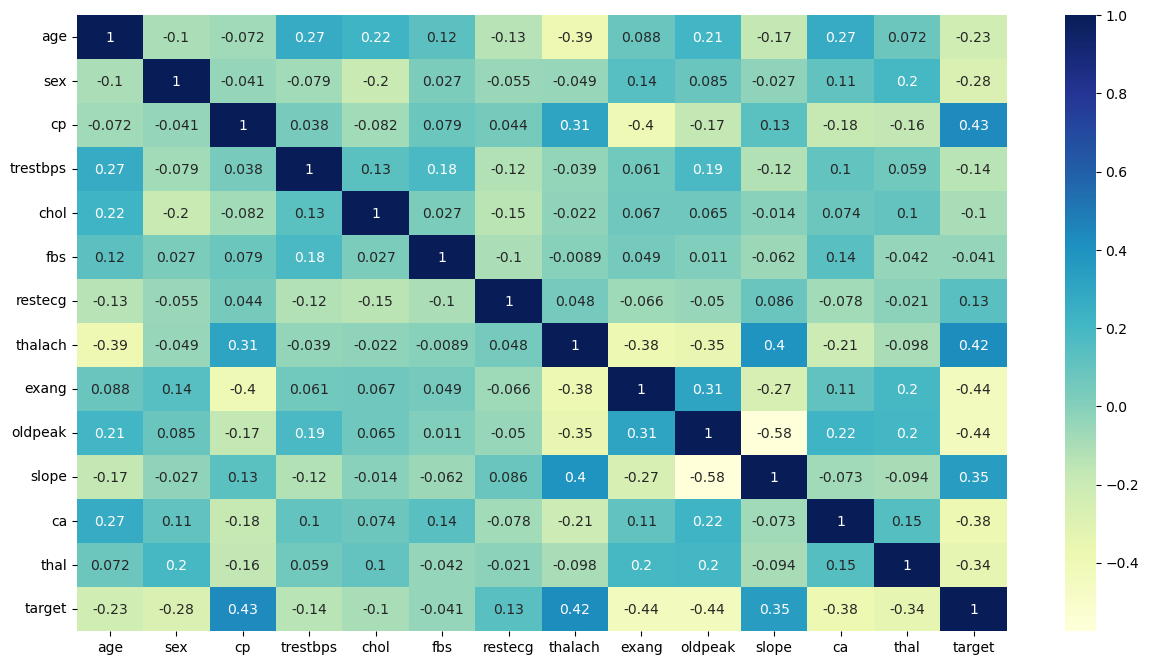

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['target'],axis=1),data.target,test_size=0.2)

In [16]:
print(f'Shape of X_train: {X_train.shape} and Shape of X_test: {X_test.shape}')
print(f"Shape of y_train: {y_train.shape} and Shape of y_test: {y_test.shape}")

Shape of X_train: (820, 13) and Shape of X_test: (205, 13)
Shape of y_train: (820,) and Shape of y_test: (205,)


In [17]:
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

In [20]:
pd.DataFrame(X_train_scaled,columns=X_train.columns).describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02,8.200000e+02
mean,1.949660e-16,-6.701956e-17,-1.169796e-16,-2.572468e-18,-1.914458e-16,6.092687e-18,-2.679428e-16,4.625027e-16,-2.588715e-16,-2.437075e-18,-9.287963e-17,-2.978647e-17,1.378301e-16
std,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00
min,-2.777472e+00,-1.514323e+00,-9.221226e-01,-2.196067e+00,-2.352023e+00,-3.977337e-01,-1.002604e+00,-3.372798e+00,-7.103430e-01,-8.973626e-01,-2.179550e+00,-7.380883e-01,-3.843076e+00
25%,-6.869883e-01,-1.514323e+00,-9.221226e-01,-6.809498e-01,-6.884580e-01,-3.977337e-01,-1.002604e+00,-7.365395e-01,-7.103430e-01,-8.973626e-01,-5.937194e-01,-7.380883e-01,-5.604485e-01
50%,8.318999e-02,6.603613e-01,5.228530e-02,-9.821255e-02,-1.208889e-01,-3.977337e-01,9.004866e-01,1.278074e-01,-7.103430e-01,-2.374928e-01,-5.937194e-01,-7.380883e-01,-5.604485e-01
75%,7.433428e-01,6.603613e-01,1.026693e+00,4.845247e-01,5.641083e-01,-3.977337e-01,9.004866e-01,7.760676e-01,1.407771e+00,5.873445e-01,9.921109e-01,2.396700e-01,1.080865e+00
max,2.503750e+00,6.603613e-01,2.001101e+00,3.980948e+00,6.220228e+00,2.514245e+00,2.803577e+00,2.288675e+00,1.407771e+00,4.216628e+00,9.921109e-01,3.172945e+00,1.080865e+00


# Logistic Regression

In [21]:
regr = LogisticRegression()

regr.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
regr.score(X_train_scaled,y_train)

0.8670731707317073

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
regr.score(X_test_scaled,y_test)

0.8097560975609757

# Random Forest

In [25]:
forest=RandomForestClassifier()
forest.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [26]:
forest.score(X_test_scaled,y_test)

1.0

In [27]:
forest.score(X_train_scaled,y_train)

1.0

# Xgboost

In [28]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
xgb.score(X_test_scaled,y_test)

1.0

In [30]:
xgb.score(X_train_scaled,y_train)

1.0